### Problem Statement

We are being provided with the neflix movies data and our goal is to analyze the dataset to find insights and give recommendations backed by data.

In [1]:
# Loading all the necessary libraries

import numpy as np               # for multidimensional array processing
import pandas as pd              # for working with structured dataset
import matplotlib.pyplot as plt  # for basic plotting functionalities
import seaborn as sns            # for plotting advanced graphs
import warnings                  # to supress any warnings coming out
warnings.filterwarnings("ignore")

In [2]:
netflix = pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 1. Basic Exploratory Data Analysis

In [3]:
netflix.shape

(8807, 12)

In the netflix dataset there are 8807 rows and 12 columns present

In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<b> Attribute Information of Netflix Data </b>

Information about each column and it range

- <b> Show_id :</b> Unique ID for every Movie / Tv Show <br> <br>
- <b> Type:</b> It contains value either Movie or TV Show <br> <br>
- <b> Title:</b> Title of the Movie / Tv Show <br>
There are distinct values in this column <br> <br>
- <b> Director:</b> Director of the Movie <br>
There are distinct values in this column <br> <br>
- <b> Cast:</b> Actors involved in the movie/show <br>
There are distinct values in this column <br> <br>
- <b> Country:</b> Country where the movie/show was produced <br>
There are distinct values in this column <br> <br>
- <b> Date_added:</b> Date it was added on Netflix <br>
Different dates as it contains dates added by Netflix employees <br> <br>
- <b> Release_year:</b> Actual Release year of the movie/show <br>
 Minimum value is 1925 and maximum value is 2021 and average value is 2014 if we round off. We can say that most movies are produced post 2010 since mean is towards 2014 <br> <br>
- <b> Rating:</b> TV Rating of the movie/show <br> <br>
- <b> Duration:</b> Total Duration - in minutes for movies or number of seasons in case of TV shows <br> <br>
- <b> Listed_in:</b> Genre of the movie <br>
This contains several genres as each movie can be of more than one genre <br> <br>
- <b> Description:</b> The summary description or movie plot what movie is all about <br> <br>

We can see that there are Null Values present in the column <b> director, cast, country, date_added, ratings </b> and <b> duration </b> columns. Rest other columns contain all entries.

<b> <font color = 'blue' > Null Values Treatment </b> </font>

For columns <b> director, rating, country, duration </b> and <b> cast </b> we can make a scrapper (pulling data from web) to fill these null values while for column <b> date_added </b> we cannot comment and it is better to drop them because Netflix is manually filling these entries.

For this, analysis we will simply drop null values in each row for a general understanding of data

In [6]:
netflix[netflix['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


If we look at Null values in duration then we can see that movies produced by director <b> Louis C.K. </b> contain all Null Values in the duration column

In [7]:
netflix[netflix['director'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [8]:
total_null_in_director = netflix[netflix['director'].isna()].shape[0]
docuseries_count = netflix[netflix['director'].isna()]['listed_in'].str.contains('Docuseries').sum()
kids_tv = netflix[netflix['director'].isna()]['listed_in'].str.contains("Kids' TV").sum()

print(total_null_in_director, docuseries_count + kids_tv)

2634 768


If we look at Null values in director then we can see that movies which are mostly Docuseries and are Kids_TV are having Nulls in director column. It isn't always true but it is happening most of the time like almost 30% of the time.

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


If we look at the dataset information then we can conclude that all columns are <b> object </b> meaning that they have string datatype except <b> release_year </b> which is integer since it has year of the movie released

#### 2. Graphical Analysis

As their is only one numerical column i.e. <b> release_year </b> hence plotting heatmaps and correlation graphs won't be a good choice. We can convert 

In [10]:
categorical = pd.DataFrame(netflix)
categorical.dropna(inplace = True)   # dropping null values for simplicity
categorical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [11]:
categorical_column_names = ['type', 'rating', 'country']

for col in categorical_column_names:
    uniqueValues = categorical[col].unique()
    counter = 1
    uniqueDict = {}
    for val in uniqueValues:
        uniqueDict[counter] = val
        counter += 1
    categorical[col] = categorical[col].replace(uniqueValues, list(uniqueDict.keys()))

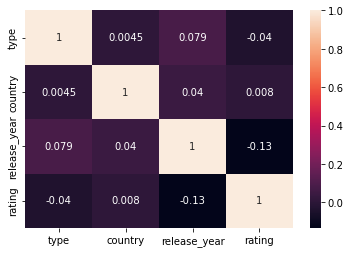

In [12]:
sns.heatmap(categorical.corr(), annot = True)
plt.show()

We have converted columns <b> type, rating </b> and <b> country </b> to numerical column by mapping value to a number. <br>
We can see that their is no significant correlation between any column.

In [13]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


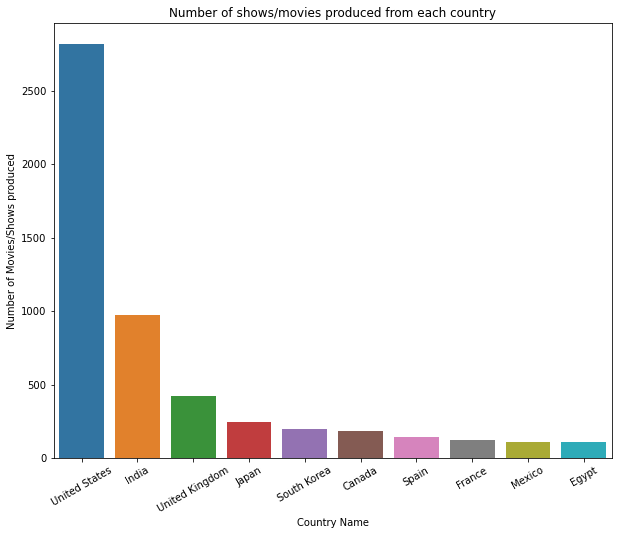

In [14]:
top10countries = netflix['country'].value_counts().head(10)

fig = plt.figure(figsize = (10, 8))
sns.barplot(top10countries.index.tolist(), top10countries.values.tolist())
plt.xticks(rotation = 30)
plt.xlabel('Country Name')
plt.ylabel('Number of Movies/Shows produced')
plt.title('Number of shows/movies produced from each country')
plt.show()

In [15]:
top10countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

If we look at above plot then we can see that most movies or TV shows produced are from United States country which is 2818 and then from India which is 972. But overall US is leading in production of movies and TV shows.

<b> Recommendation : </b> Netflix can produce more TV shows or Movies which are United States based or India based since, their fan base is high and surely it will attract more users.

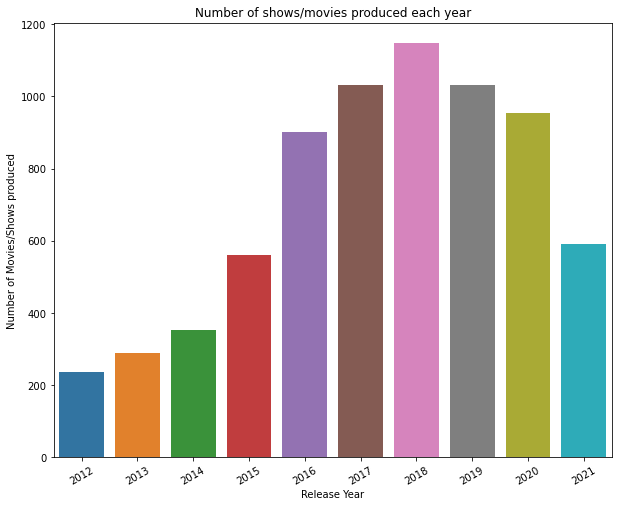

In [16]:
top10years = netflix['release_year'].value_counts().head(10)

fig = plt.figure(figsize = (10, 8))
sns.barplot(top10years.index.tolist(), top10years.values.tolist())
plt.xticks(rotation = 30)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows produced')
plt.title('Number of shows/movies produced each year')
plt.show()

In [17]:
top10years

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

If we look at above plot then most TV shows and movies are produced in the year 2018 i.e. 1147 followed by 2017 and 2019.

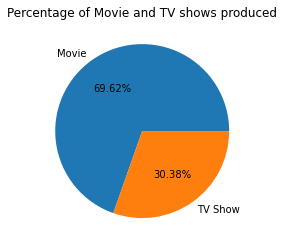

In [18]:
TvorMovie = netflix['type'].value_counts()

plt.pie(x = TvorMovie.values.tolist(), 
       labels = TvorMovie.index.tolist(),
       autopct = '%.2f%%')
plt.title('Percentage of Movie and TV shows produced')
plt.show()

In [19]:
TvorMovie

Movie      6131
TV Show    2676
Name: type, dtype: int64

If we look at above plot then we can say that mostly Movies are being produced and less TV Shows are being produced. Since, producing TV show requires lot of cost due to several seasons and most directors try to avoid this.

In [20]:
yearwisetype = netflix.groupby(['release_year', 'type']).count().title.reset_index().tail(20)
yearwisetype

,release_year,type,title
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88
105,2015,Movie,398
106,2015,TV Show,162
107,2016,Movie,658
108,2016,TV Show,244


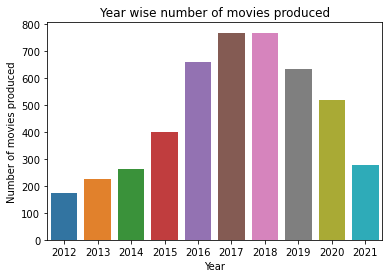

In [21]:
sns.barplot(yearwisetype[yearwisetype['type'] == 'Movie'].release_year.values.tolist(),
            yearwisetype[yearwisetype['type'] == 'Movie'].title.values.tolist())
plt.xlabel('Year')
plt.ylabel('Number of movies produced')
plt.title('Year wise number of movies produced')
plt.show()

If we look at above data then we can say that Movies production has increased till 2017 then it got stable at 2018 and then it started decreasing which means that users are not liking movies to watch in free time.

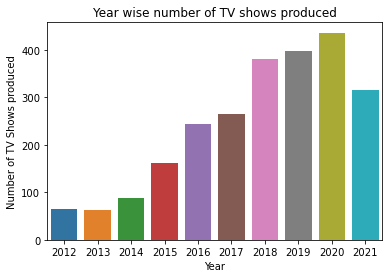

In [22]:
sns.barplot(yearwisetype[yearwisetype['type'] == 'TV Show'].release_year.values.tolist(),
            yearwisetype[yearwisetype['type'] == 'TV Show'].title.values.tolist())
plt.xlabel('Year')
plt.ylabel('Number of TV Shows produced')
plt.title('Year wise number of TV shows produced')
plt.show()

If we look at above data then we can say that TV shows production has an increasing trend i.e. each year more number of TV shows are being produced. This is true till year 2020 since for 2021 we have data till September (month when netflix have uploaded it). 

<b> Recommendation : </b> Netflix can produce more TV shows as it is mostly liked by customers on contrary to Movies because there is always a curiosity that what will happen next in a TV show as compared to a movie which requires Sequels.
In recent times, people are mostly shifting to watch TV shows which can bind them more as compared to Movies

In [23]:
top10ratedmovies = netflix['rating'].value_counts().head(10)
top10ratedmovies

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

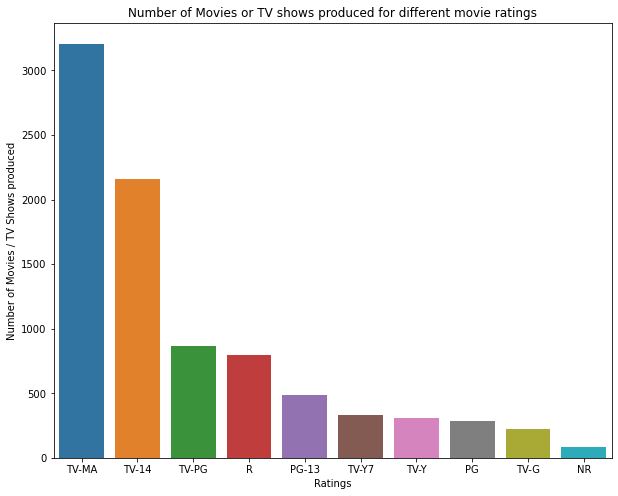

In [24]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(top10ratedmovies.index.tolist(), top10ratedmovies.values.tolist())
plt.xlabel('Ratings')
plt.ylabel('Number of Movies / TV Shows produced')
plt.title('Number of Movies or TV shows produced for different movie ratings')
plt.show()

If we look at above data then we can say that mostly people admire TV-MA (TV Mature Audience Only) rated movies or TV shows and on second number TV - 14 (Parents Strongly Cautioned. Some Material May Be Inappropriate For Children Under 14) movies or TV shows

<b> Recommendation : </b> Netflix can produce more TV shows or Movies which are of below ratings as these are mostly admired by the audiences.

- TV-MA (TV Mature Audience Only)
- TV-14 (Parents Strongly Cautioned. Some Material May Be Inappropriate For Children Under 14)
- TV-PG (Parental Guidance Suggested)
- R     (Restricted)
- PG-13 (Parents Strongly Cautioned. Some Material May Be Inappropriate For Children Under 13)

#### 3. Director Wise Analysis

In [25]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Since, director contains multiple entries hence we will try to convert this data into 1NF form i.e. for each director we will have one row

Example

Before conversion <br>
DA, DB    2019

After conversion <br> 
DA     2019      <br>
DB     2019    

In [26]:
directors = pd.DataFrame(netflix)
directors = directors[~directors['director'].isna()]
directors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [27]:
directors['director'] = directors['director'].str.split(', ')
directors = directors.explode('director')

In [28]:
directors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


Now, the column <b> director </b> is in 1NF form i.e. there are no multiple entries in this column. We can use it to for further analysis.

In [29]:
top10moviedirectors = directors[directors['type'] == 'Movie']['director'].value_counts().head(10)
top10moviedirectors

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: director, dtype: int64

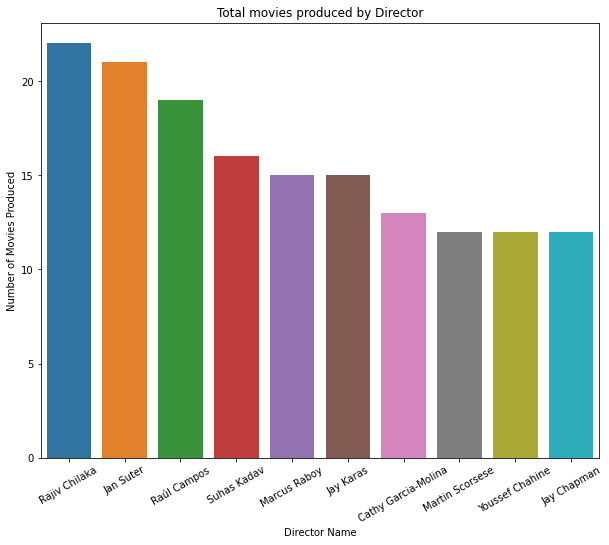

In [30]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(top10moviedirectors.index.tolist(), top10moviedirectors.values.tolist())
plt.xlabel('Director Name')
plt.ylabel('Number of Movies Produced')
plt.title('Total movies produced by Director')
plt.xticks(rotation = 30)
plt.show()

From above analysis we can see that most number of movies are directed by <b> Rajiv Chilaka </b> and netflix can collaborate with him to produce more movies.

<b> Recommendation : </b> Netflix can collaborate with below 5 directors to produce more movies as these are mostly liked by user.

- Rajiv Chilaka
- Jan Suter
- Raul Campos
- Suhas Kadav
- Marcus Raboy

In [31]:
top10showdirectors = directors[directors['type'] == 'TV Show']['director'].value_counts().head(10)
top10showdirectors

Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: director, dtype: int64

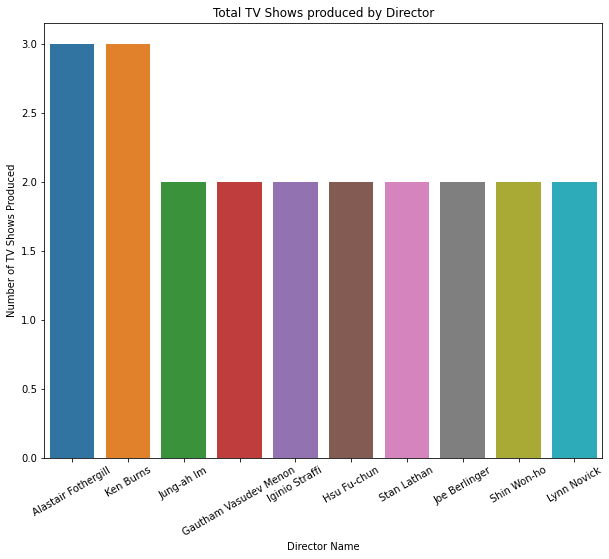

In [32]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(top10showdirectors.index.tolist(), top10showdirectors.values.tolist())
plt.xlabel('Director Name')
plt.ylabel('Number of TV Shows Produced')
plt.title('Total TV Shows produced by Director')
plt.xticks(rotation = 30)
plt.show()

From above analysis we can see that most TV shows are being produced by <b> Alastair Fothergill </b> and <b> Ken Burns </b> and netflix can collaborate with them for future shows

<b> Recommendation : </b> Netflix can collaborate with below 2 directors to produce more TV shows as these are mostly liked by user.

- Alastair Fothergill
- Ken Burns

In [33]:
yearwisedirector = directors.groupby(['release_year', 'director']).count().title.reset_index()
yearwisedirector = yearwisedirector[yearwisedirector['release_year'] > 2018]
yearwisedirector

,release_year,director,title
5035,2019,A. L. Vijay,1
5036,2019,Aaron Lieber,1
5037,2019,Aaron Woodley,1
5038,2019,Abba T. Makama,1
5039,2019,Abhijit Kokate,1
...,...,...,...
6626,2021,Yin Chen-hao,1
6627,2021,Yulene Olaizola,1
6628,2021,Zack Snyder,1
6629,2021,Zhang Chong,1


In [34]:
yearwisedirector = pd.pivot_table(values = 'title', index = 'director', columns = 'release_year', data = yearwisedirector).fillna(0)
yearwisedirector

release_year,2019,2020,2021
director,,,
A. L. Vijay,1.0,0.0,0.0
A. Raajdheep,0.0,1.0,0.0
Aaron Lieber,1.0,0.0,0.0
Aaron Moorhead,0.0,1.0,0.0
Aaron Sorkin,0.0,1.0,0.0
...,...,...,...
Zuko Nodada,1.0,0.0,0.0
Àlex Pastor,0.0,1.0,0.0
Ángel Gómez Hernández,0.0,1.0,0.0


In [35]:
yearwisedirector['ratio19-20'] = yearwisedirector[2020] / yearwisedirector[2019]
yearwisedirector['ratio20-21'] = yearwisedirector[2021] / yearwisedirector[2020]
yearwisedirector['ratio19-20'] = yearwisedirector['ratio19-20'].replace(np.inf, 0)
yearwisedirector['ratio20-21'] = yearwisedirector['ratio20-21'].replace(np.inf, 0)
yearwisedirector['overallgrowth'] = yearwisedirector['ratio20-21'] * 100 / yearwisedirector['ratio19-20']
yearwisedirector['overallgrowth'] = yearwisedirector['overallgrowth'].replace(np.inf, 0)
yearwisedirector = yearwisedirector.fillna(0)

In [36]:
yearwisedirector[(yearwisedirector['ratio19-20'] >= 1) & (yearwisedirector['ratio20-21'] > 1)]

release_year,2019,2020,2021,ratio19-20,ratio20-21,overallgrowth
director,,,,,,
Bruno Garotti,1.0,1.0,2.0,1.0,2.0,200.0
Troy Miller,1.0,1.0,2.0,1.0,2.0,200.0


From above analysis we can say that <b> Bruno Garotti </b> and <b> Troy Miller </b> have done really well in past 3 years and they have increased movies produced. Hence, Netflix can also collaborate with them since, they are producing more shows with respect to year.

<b> Recommendation : </b> Netflix can collaborate with below 2 directors for future since, they have increased movie production within last 3 years.

- Bruno Garotti
- Troy Miller

In [37]:
yearwisedirector.sort_values('overallgrowth', ascending = True).head(3)

release_year,2019,2020,2021,ratio19-20,ratio20-21,overallgrowth
director,,,,,,
A. L. Vijay,1.0,0.0,0.0,0.0,0.0,0.0
Nizar Shafi,1.0,0.0,0.0,0.0,0.0,0.0
Niyi Akinmolayan,1.0,0.0,0.0,0.0,0.0,0.0


From above analysis we can say that <b> A. L. Vijay, Nizar Shafi </b> and <b> Niyi Akinmolayan </b> have less movies as year progresses.

<b> Recommendation : </b> For below 3 directors netflix can choose to discontinue with them since, they have produced movies in 2019 but no single movie has been produced by them in year 2020 and 2021.

- A. L. Vijay
- Nizar Shafi
- Niyi Akinmolayan

#### 4. Movie Cast Wise Analysis

In [38]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Since, cast contains multiple entries hence we will try to convert this data into 1NF form i.e. for each cast we will have one row

Example

Before conversion <br>
CA, CB 2019

After conversion <br>
CA 2019 <br>
CB 2019

In [39]:
cast = pd.DataFrame(netflix)
cast = cast[~cast['cast'].isna()]
cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [40]:
cast['cast'] = cast['cast'].str.split(', ')
cast = cast.explode('cast')
cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Now, the column cast is in <b> 1NF form </b> i.e. there are no multiple entries in this column. We can use it to for further analysis.

In [41]:
top10casts = cast['cast'].value_counts().head(10)
top10casts

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

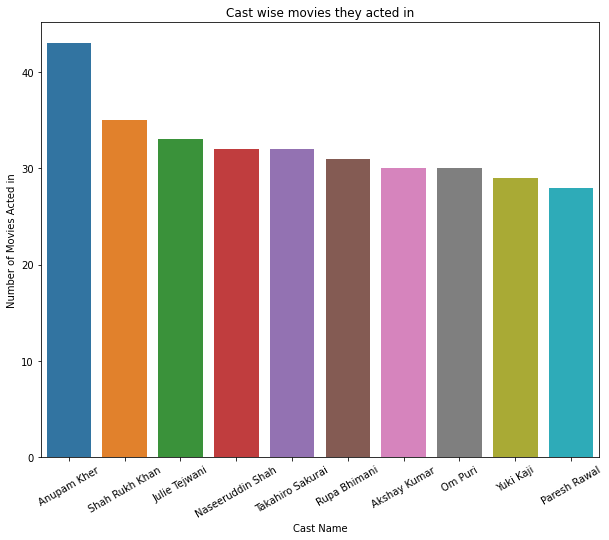

In [42]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(top10casts.index.tolist(), top10casts.values.tolist())
plt.xlabel('Cast Name')
plt.ylabel('Number of Movies Acted in')
plt.title('Cast wise movies they acted in')
plt.xticks(rotation = 30)
plt.show()

From above analysis we can see that <b> Anupam Kher </b> and <b> Shah Rukh Khan </b> are the most liked actors and the actors who have acted in most movies and TV shows

<b> Recommendation : </b> Netflix can collaborate with below 5 actors as they are mostly liked by public and they are trending in movies since they have acted in most movies or TV shows.

- Anupam Kher
- Shah Rukh Khan 
- Julie Tejwani
- Naseeruddin Shah
- Takahiro Sakurai

In [43]:
yearwisecast = cast.groupby(['release_year', 'cast']).count().title.reset_index()
yearwisecast = yearwisecast[yearwisecast['release_year'] > 2018]
yearwisecast

,release_year,cast,title
41651,2019,"""Riley"" Lakdhar Dridi",1
41652,2019,AJ Rivera,1
41653,2019,Aakash Dabhade,2
41654,2019,Aarna Sharma,1
41655,2019,Aaron Abrams,1
...,...,...,...
58043,2021,Úrsula Corberó,1
58044,2021,Þorsteinn Bachmann,1
58045,2021,İlker Aksum,1
58046,2021,İrem Sak,1


In [44]:
yearwisecast = pd.pivot_table(values = 'title', index = 'cast', columns = 'release_year', data = yearwisecast).fillna(0)
yearwisecast

release_year,2019,2020,2021
cast,,,
Jr.,0.0,1.0,0.0
"""Riley"" Lakdhar Dridi",1.0,0.0,0.0
9m88,0.0,0.0,1.0
A.D. Miles,0.0,1.0,0.0
AC Lim,0.0,0.0,1.0
...,...,...,...
İpek Filiz Yazıcı,0.0,1.0,0.0
İrem Sak,0.0,0.0,1.0
Şehsuvar Aktaş,0.0,0.0,1.0


In [45]:
yearwisecast['ratio19-20'] = yearwisecast[2020] / yearwisecast[2019]
yearwisecast['ratio20-21'] = yearwisecast[2021] / yearwisecast[2020]
yearwisecast['ratio19-20'] = yearwisecast['ratio19-20'].replace(np.inf, 0)
yearwisecast['ratio20-21'] = yearwisecast['ratio20-21'].replace(np.inf, 0)
yearwisecast = yearwisecast.fillna(0)

In [46]:
yearwisecast[(yearwisecast['ratio19-20'] > 1) & (yearwisecast['ratio20-21'] > 1)]

release_year,2019,2020,2021,ratio19-20,ratio20-21
cast,,,,,
Fortune Feimster,1.0,4.0,11.0,4.0,2.75
Grey Griffin,2.0,4.0,5.0,2.0,1.25


From above analysis we can say that <b> Fortune Feimster </b> and <b> Grey Griffin </b> have done really well in past 3 years and they have got more films in next year like for Fortune Feimster he got 1 film in 2019, 4 in 2020 and 11 in 2021 and for Grey Griffin got 2 films in 2019, 4 films in 2020 and 5 films in 2021.

<b> Recommendation : </b> Netflix can collaborate with below 2 cast as their charms have increased in past 3 years for future projects.

- Fortune Feimster
- Grey Griffin

#### 5. Movie Genre Wise Analysis

In [47]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Since, listed_in or genre contains multiple entries hence we will try to convert this data into 1NF form i.e. for each listed_in we will have one row

Example

Before conversion <br>
GA, GB 2019

After conversion <br>
GA 2019 <br>
GB 2019

In [48]:
genre = pd.DataFrame(netflix)
genre = genre[~genre['listed_in'].isna()]
genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [49]:
genre['listed_in'] = genre['listed_in'].str.split(', ')
genre = genre.explode('listed_in')
genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


Now, the column <b> listed_in </b> is in 1NF form i.e. there are no multiple entries in this column. We can use it to for further analysis.

In [50]:
top10genres = genre['listed_in'].value_counts().head(10)
top10genres

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

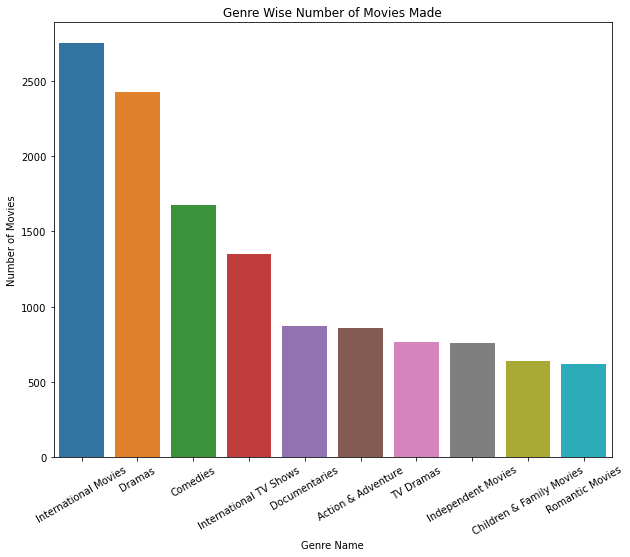

In [51]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(top10genres.index.tolist(), top10genres.values.tolist())
plt.xlabel('Genre Name')
plt.ylabel('Number of Movies')
plt.title('Genre Wise Number of Movies Made')
plt.xticks(rotation = 30)
plt.show()

From above analysis we can see that <b> International Movies </b> and <b> Dramas </b> are the most liked genres among audience and Netflix can continue producing them.

<b> Recommendation : </b> Netflix is producing movies but they can focus on below 6 genres more TV Shows and Movies and produce more for these genres as these are mostly liked by audience.

- International Movies
- Dramas
- Comedies
- International TV Shows
- Documentaries
- Action & Adventure

In [52]:
yearwisegenre = genre.groupby(['release_year', 'listed_in']).count().title.reset_index()
yearwisegenre = yearwisegenre[yearwisegenre['release_year'] > 2018]
yearwisegenre

,release_year,listed_in,title
1074,2019,Action & Adventure,44
1075,2019,Anime Features,6
1076,2019,Anime Series,18
1077,2019,British TV Shows,26
1078,2019,Children & Family Movies,82
...,...,...,...
1187,2021,TV Sci-Fi & Fantasy,14
1188,2021,TV Shows,2
1189,2021,TV Thrillers,9
1190,2021,Teen TV Shows,8


In [53]:
yearwisegenre = pd.pivot_table(values = 'title', index = 'listed_in', columns = 'release_year', data = yearwisegenre).fillna(0)
yearwisegenre.head(10)

release_year,2019,2020,2021
listed_in,,,
Action & Adventure,44.0,46.0,37.0
Anime Features,6.0,3.0,6.0
Anime Series,18.0,21.0,23.0
British TV Shows,26.0,33.0,17.0
Children & Family Movies,82.0,83.0,40.0
Classic & Cult TV,3.0,3.0,0.0
Comedies,159.0,133.0,70.0
Crime TV Shows,92.0,87.0,47.0
Documentaries,104.0,77.0,53.0


In [54]:
yearwisegenre['ratio19-20'] = yearwisegenre[2020] / yearwisegenre[2019]
yearwisegenre['ratio20-21'] = yearwisegenre[2021] / yearwisegenre[2020]
yearwisegenre['ratio19-20'] = yearwisegenre['ratio19-20'].replace(np.inf, 0)
yearwisegenre['ratio20-21'] = yearwisegenre['ratio20-21'].replace(np.inf, 0)
yearwisegenre = yearwisegenre.fillna(0)

In [55]:
yearwisegenre[(yearwisegenre['ratio19-20'] > 1) & (yearwisegenre['ratio20-21'] > 1)]

release_year,2019,2020,2021,ratio19-20,ratio20-21
listed_in,,,,,
Anime Series,18.0,21.0,23.0,1.166667,1.095238


From above analysis we can say that Anime Series craze has increased in past 3 years. In 2019 18 movies are being produced, in 2020 21 movies are being produced and in 2021 23 movies have been produced

<b> Recommendation : </b> Along with 6 genres listed above Netflix can also produce <b> Anime Series </b> as people are actually crazy about them and their fan base has increased in past 3 years.